# Task 5
To analyze the dataset and determine if the target variable 'class' is balanced or not, we need to calculate the proportion of each class in the target variable. Based on the given data, we can count the number of occurrences of each class (<=50K and >50K) and calculate the percentage of each class.

We chose random under-sampling because it's a simple and efficient technique to balance the class distribution in the dataset by randomly eliminating instances from the majority class. It's particularly useful when the dataset is large, and reducing the size of the majority class doesn't significantly affect the overall performance of the model (it's our case since we have a dataset of 22000 entries and only need 5000). However, it's important to note that random under-sampling can potentially remove important information from the majority class, and it may not be the best choice for very small datasets or those with a high imbalance ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('../../data/adult.csv', names=["age", "workclass", "fnlwgt", "education", "educational-num", "marital-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])

income_counts = data['income'].value_counts()
income_percentage = data['income'].value_counts(normalize=True) * 100

print("Counts of each class:")
print(income_counts)
print("\nPercentage of each class:")
print(income_percentage)

Counts of each class:
income
<=50K     3828
>50K      1172
income       1
Name: count, dtype: int64

Percentage of each class:
income
<=50K     76.544691
>50K      23.435313
income     0.019996
Name: proportion, dtype: float64


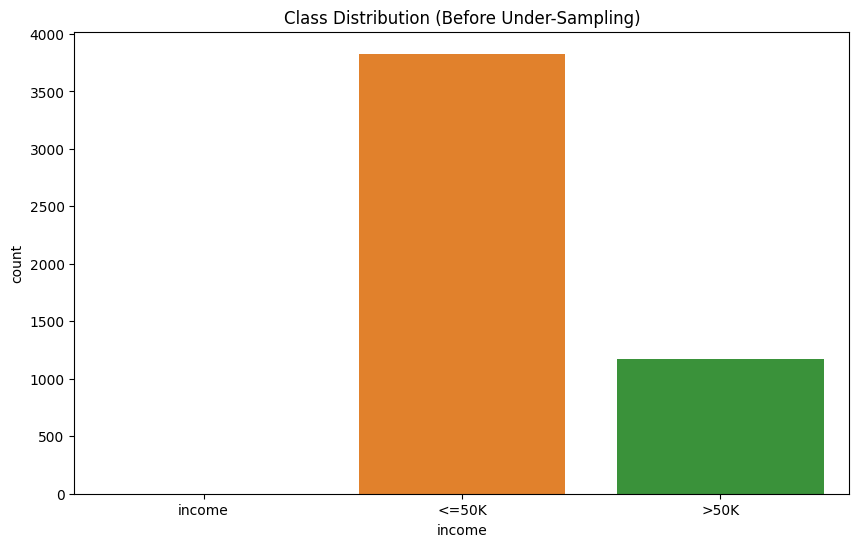

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=data)
plt.title("Class Distribution (Before Under-Sampling)")
plt.show()


Counts of each class after random under-sampling:
Counter({'<=50K': 1, '>50K': 1, 'income': 1})


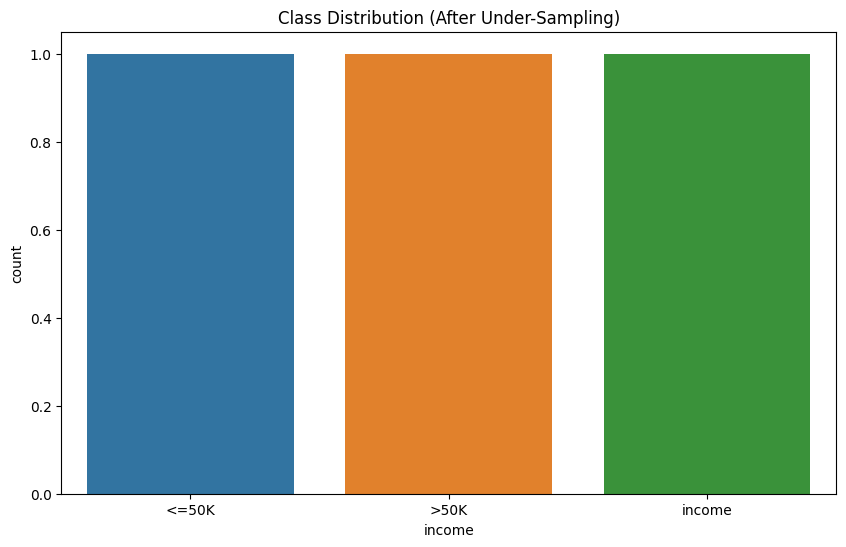

In [4]:
X = data.drop('income', axis=1)
y = data['income']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("\nCounts of each class after random under-sampling:")
print(Counter(y_resampled))

resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=resampled_data)
plt.title("Class Distribution (After Under-Sampling)")
plt.show()